In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Classification_train.csv")

dataset.head()

30000


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Shuffling the data
np.random.seed(42)
Train_data = dataset.iloc[np.random.permutation(len(dataset))]

target = dataset.iloc[:, 0]
features = dataset.iloc[:, 1:]
# Conversion to arrays
X = features.to_numpy()
y = target.to_numpy()
#Scaling
X = X/255
# Splitting
test_size = 0.2
split_index = int(len(dataset) * (1 - test_size))

X_train = X[:split_index]
y_train = y[:split_index]

X_test = X[split_index:]
y_test = y[split_index:]

In [ ]:
def predict(k, X_train, Y_train, X):
    y_pred = []
    for x in X:
        distances = np.sum((X_train - x)**2, axis=1)
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [Y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        y_pred.append(most_common)

    return np.array(y_pred)

In [ ]:
y_pred = predict(1 ,X_train ,y_train , X_test)

In [ ]:
print(y_pred)

[0 0 1 ... 9 3 9]


In [ ]:
def f1_score(y_true, y_pred):
    #True Positives, False Positives, and False Negatives
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    f1_score = 2 * (precision * recall) / (precision + recall)

    return f1_score

In [ ]:
def calc_accuracy(y, y_pred):
    accuracy = np.sum(y == y_pred) / len(y)
    return accuracy


In [ ]:
f1 = f1_score(y_test, y_pred)
tp = np.sum((y_test == 1) & (y_pred == 1))
print(f"F1 Score: {f1}")

F1 Score: 0.9851239669421487


In [ ]:
acc = calc_accuracy(y_test , y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.9838333333333333


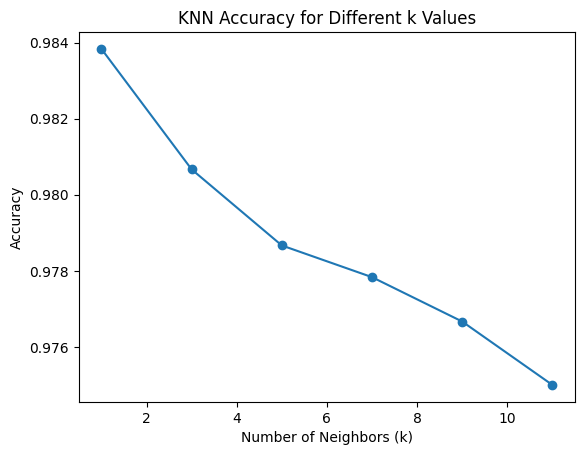

In [ ]:
k_values = [1, 3, 5, 7, 9, 11]
accuracy = []

for k in k_values:

    y_pred = predict(k , X_train , y_train , X_test)
    acc = calc_accuracy(y_test , y_pred)
    accuracy.append(acc)


plt.plot(k_values, accuracy , marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
test_data.head()

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Classification_test.csv")
X = test_data.iloc[ : , 1 : ].to_numpy()
X = X / 255
y_pred = predict(1 ,X_train ,y_train , X)
print(y_pred)

